##### In this notebook, I worked on the provided dataset. I have done the following steps:
- Preprocess the data.
- Dimensionality reduction.
- Try multiple ML algorithms and then choose one from them.

Preprocessing data involves the following steps:
- Find out null and non-numeric values.
- Impute those values.

### Preprocessing:
#### Find out null and non-numeric values:

In [32]:
import pandas as pd

# Load the Excel file
file_path = 'test_data.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')
labels_df = pd.read_excel(file_path, sheet_name='labels')

# Display the top five rows of each sheet
data_df.head(), labels_df.head(), data_df.shape, labels_df.shape

(  Sample    F1     F2    F3    F4    F5    F6    F7    F8     F9  ...   F77  \
 0     S1  3.65   9.54  3.14  3.48  4.73  3.00  3.06  3.89   3.49  ...  2.96   
 1     S2  3.61   3.78  3.15   NaN  3.34  6.72  3.07  8.31   3.03  ...   NaN   
 2     S3  3.33  10.08  2.92  5.60  5.73  2.92   NaN  4.05  10.56  ...  2.90   
 3     S4  6.71   7.24  3.14  3.47   7.3  2.86  3.14  5.22   3.62  ...  2.91   
 4     S5  5.02   8.74  3.25  8.89  8.06  2.92  3.13   5.6  10.99  ...  2.90   
 
      F78   F79   F80   F81   F83   F85    Z1     Z2    Z3  
 0  11.73  2.89  8.34  3.01  9.12  2.89  3.28  12.09  8.83  
 1   3.21  2.84  3.38  3.62  2.79  3.32  6.96  11.66  7.73  
 2   2.87  2.68  3.30  2.83   2.8  2.73   7.6    NaN  7.68  
 3   2.91  2.82  3.45  3.06  2.66  3.08  3.59  10.67  7.64  
 4   2.68  2.68  3.45  2.88  2.92  2.90  6.92  12.87  7.59  
 
 [5 rows x 86 columns],
   Sample   Label
 0     S1  Group0
 1     S2  Group1
 2     S3  Group1
 3     S4  Group1
 4     S5  Group1,
 (804, 86),
 (804

In [33]:
# Checking for missing values
print("Missing values per column in data:")
print(data_df.isnull().sum())

print("Missing values per column in labels:")
print(labels_df.isnull().sum())

Missing values per column in data:
Sample     0
F1        41
F2        47
F3        30
F4        49
          ..
F83       45
F85       43
Z1        39
Z2        42
Z3        42
Length: 86, dtype: int64
Missing values per column in labels:
Sample    0
Label     0
dtype: int64


------
From the above output, it can be seen that there are no missing values in the labels. However, the number of null values in the dataset is relatively high, as almost every column has null values. So, I need to take care of it using imputation. I can not just delete the rows because the number of null values is significant (around 40 rows per column out of 804 rows, which is almost 5 %)

Before imputation, let's look at the column data types.

---

In [34]:
# Checking for data types
print("Data types in data:")
datatypes = data_df.dtypes
print(datatypes.value_counts())

Data types in data:
float64    47
object     39
Name: count, dtype: int64


---
Here, 47 columns have data types of float. And 39 have datatypes of object. When I checked the head of the dataset, it seemed every column had float values. 

However, I am getting object types for some columns in the above output, which means there are some non-numeric values in those columns. Let's check for non-numeric values, then.

---

In [35]:
# Find the columns that need to be checked for non numeric values
data_columns = data_df.columns[1:]

# Initialize a dictionary to store non-numeric values
non_numeric_values = {}

# Iterate over the specified columns
for col in data_columns:
    # pd.to_numeric with errors='coerce' to convert the column to numeric, coercing errors to NaN
    # Then, check for NaN values that indicate non-numeric entries
    non_numeric_mask = pd.to_numeric(data_df[col], errors='coerce').isna()
    
    # Extract non-numeric values
    if non_numeric_mask.any():
        non_numeric_values[col] = data_df.loc[non_numeric_mask, col].unique()

# Print non-numeric values if found
if non_numeric_values:
    for col, values in non_numeric_values.items():
        print(f"Non-numeric values found in column '{col}': {values}")
else:
    print("No non-numeric values found in specified columns.")

Non-numeric values found in column 'F1': [nan]
Non-numeric values found in column 'F2': [nan]
Non-numeric values found in column 'F3': [nan '#value']
Non-numeric values found in column 'F4': [nan]
Non-numeric values found in column 'F5': [nan '#value']
Non-numeric values found in column 'F6': [nan]
Non-numeric values found in column 'F7': [nan '#value']
Non-numeric values found in column 'F8': [nan '#value']
Non-numeric values found in column 'F9': [nan '#value']
Non-numeric values found in column 'F10': [nan '#value']
Non-numeric values found in column 'F11': [nan '#value']
Non-numeric values found in column 'F12': [nan '#value']
Non-numeric values found in column 'F13': [nan '#value']
Non-numeric values found in column 'F14': [nan]
Non-numeric values found in column 'F15': [nan]
Non-numeric values found in column 'F16': [nan]
Non-numeric values found in column 'F17': [nan '#value']
Non-numeric values found in column 'F18': [nan]
Non-numeric values found in column 'F19': [nan '#value'

---
The above output shows the non-numeric value that is creating the problem is "#value." 

Now, let's check how many times this appears in each column.

---

In [36]:
# Define the columns to check for non-numeric values
data_columns = data_df.columns[1:]

# Initialize a dictionary to store counts of "#value"
value_counts = {}

# Iterate over the specified columns
for col in data_columns:
    # Count the occurrences of "#value"
    count = (data_df[col] == '#value').sum()
    
    if count > 0:
        value_counts[col] = count

# Print counts if found
if value_counts:
    for col, count in value_counts.items():
        print(f"'#value' found in column '{col}' {count} times.")
else:
    print("No '#value' found in specified columns.")

'#value' found in column 'F3' 1 times.
'#value' found in column 'F5' 1 times.
'#value' found in column 'F7' 1 times.
'#value' found in column 'F8' 1 times.
'#value' found in column 'F9' 1 times.
'#value' found in column 'F10' 1 times.
'#value' found in column 'F11' 1 times.
'#value' found in column 'F12' 1 times.
'#value' found in column 'F13' 1 times.
'#value' found in column 'F17' 1 times.
'#value' found in column 'F19' 1 times.
'#value' found in column 'F21' 1 times.
'#value' found in column 'F24' 1 times.
'#value' found in column 'F25' 1 times.
'#value' found in column 'F29' 1 times.
'#value' found in column 'F32' 1 times.
'#value' found in column 'F35' 1 times.
'#value' found in column 'F36' 1 times.
'#value' found in column 'F38' 1 times.
'#value' found in column 'F40' 1 times.
'#value' found in column 'F48' 1 times.
'#value' found in column 'F51' 1 times.
'#value' found in column 'F52' 1 times.
'#value' found in column 'F53' 1 times.
'#value' found in column 'F56' 1 times.
'#val

---
The above output shows that "#value" occurs only once in each column that has it. So, I assume that there was some problem when the data was being collected. As the occurrence is very low, I can assume it is as nan values.

So I have decided to replace "#value" with "nan" before imputing. Otherwise, it will create errors.

---

In [37]:
import numpy as np
# Replace '#value' with NaN in the entire DataFrame
data_df = data_df.replace('#value', np.nan)

/var/folders/xx/_jzdqqtd4zj64fg6g26cwdrc0000gn/T/ipykernel_2566/2666511509.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.replace('#value', np.nan)


In [38]:
# Checking for data types
print("Data types in data:")
datatypes = data_df[1:].dtypes
print(datatypes)
print(datatypes.value_counts()) 

Data types in data:
Sample     object
F1        float64
F2        float64
F3        float64
F4        float64
           ...   
F83       float64
F85       float64
Z1        float64
Z2        float64
Z3        float64
Length: 86, dtype: object
float64    85
object      1
Name: count, dtype: int64


---
Now I can see that apart from the sample column, which is the sample indicator, every column is of a type float. So I can now safely perform imputation.

#### Imputation: 
Let's look at the description of the dataset before imputation.

---

In [39]:
# dataset statistics
data_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F77,F78,F79,F80,F81,F83,F85,Z1,Z2,Z3
count,763.000000,757.000000,773.000000,755.000000,761.000000,780.000000,761.000000,757.000000,764.000000,772.000000,...,774.000000,756.000000,748.000000,761.000000,765.000000,758.000000,761.000000,764.000000,762.000000,762.00000
mean,1314.530682,1326.994729,4.540492,1330.144146,5.295506,1285.019641,3.167884,5.498481,5.426008,4.966645,...,1296.812119,5.815741,2.807861,1317.912497,4.099647,3.310699,1317.269435,7.030641,1321.903832,1320.28937
std,36202.252590,36345.363869,2.375534,36393.484381,2.809916,35805.601437,0.898405,1.984960,3.202418,2.552601,...,35944.048302,3.414553,0.395533,36249.795598,2.379824,1.660063,36249.818924,3.451012,36225.794657,36225.85312
min,2.880000,2.860000,2.730000,2.750000,2.980000,2.620000,2.790000,3.110000,2.870000,2.670000,...,2.710000,2.560000,2.380000,3.000000,2.600000,2.490000,2.560000,2.940000,2.630000,3.44000
25%,3.300000,3.830000,3.090000,3.285000,3.360000,2.770000,2.970000,4.000000,3.260000,3.180000,...,2.950000,3.000000,2.660000,3.360000,2.940000,2.760000,2.840000,3.330000,6.075000,5.85250
50%,3.420000,5.520000,3.240000,4.080000,3.600000,2.840000,3.030000,4.690000,3.490000,3.520000,...,3.100000,3.580000,2.770000,3.450000,3.080000,2.850000,2.930000,7.000000,11.500000,7.77500
75%,3.640000,7.710000,5.260000,7.635000,7.190000,2.920000,3.110000,6.570000,7.797500,6.490000,...,5.997500,9.240000,2.890000,3.580000,3.460000,2.970000,3.060000,10.312500,12.730000,10.17000
max,999999.000000,999999.000000,12.440000,999999.000000,13.100000,999999.000000,12.720000,12.960000,12.840000,12.730000,...,999999.000000,13.220000,9.100000,999999.000000,12.280000,12.510000,999999.000000,13.140000,999999.000000,999999.00000


---
From the data description, I can see that in some columns, the max value is very high. But the minimum value is very low. It means there is a high chance of outliers.

So, I have chosen median values for imputation because they are less sensitive to outliers.

---

In [40]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer for median imputation
imputer = SimpleImputer(strategy='median')

# Impute missing values in the data
imputed_data_df = pd.DataFrame(imputer.fit_transform(data_df.drop(columns=['Sample'])), columns=data_df.columns[1:])

# Add the 'Sample' column back
imputed_data_df.insert(0, 'Sample', data_df['Sample'])

imputed_data_df.head()


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F77,F78,F79,F80,F81,F83,F85,Z1,Z2,Z3
0,S1,3.65,9.54,3.14,3.48,4.73,3.00,3.06,3.89,3.49,...,2.96,11.73,2.89,8.34,3.01,9.12,2.89,3.28,12.09,8.83
1,S2,3.61,3.78,3.15,4.08,3.34,6.72,3.07,8.31,3.03,...,3.10,3.21,2.84,3.38,3.62,2.79,3.32,6.96,11.66,7.73
2,S3,3.33,10.08,2.92,5.60,5.73,2.92,3.03,4.05,10.56,...,2.90,2.87,2.68,3.30,2.83,2.80,2.73,7.60,11.50,7.68
3,S4,6.71,7.24,3.14,3.47,7.30,2.86,3.14,5.22,3.62,...,2.91,2.91,2.82,3.45,3.06,2.66,3.08,3.59,10.67,7.64
4,S5,5.02,8.74,3.25,8.89,8.06,2.92,3.13,5.60,10.99,...,2.90,2.68,2.68,3.45,2.88,2.92,2.90,6.92,12.87,7.59


In [41]:

# Display summary statistics 
imputed_data_df.describe()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F77,F78,F79,F80,F81,F83,F85,Z1,Z2,Z3
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,1247.670560,1249.744341,4.490348,1249.326803,5.204826,1246.745622,3.160510,5.451219,5.329689,4.909067,...,1248.539279,5.682264,2.805224,1247.611642,4.050187,3.284341,1246.975162,7.029117,1253.449900,1251.725187
std,35267.108174,35267.034990,2.342665,35267.049779,2.760169,35267.140809,0.874571,1.935323,3.149927,2.517180,...,35267.077586,3.353086,0.381613,35267.110256,2.331639,1.615365,35267.132716,3.363967,35266.904256,35266.965057
min,2.880000,2.860000,2.730000,2.750000,2.980000,2.620000,2.790000,3.110000,2.870000,2.670000,...,2.710000,2.560000,2.380000,3.000000,2.600000,2.490000,2.560000,2.940000,2.630000,3.440000
25%,3.310000,3.935000,3.100000,3.310000,3.370000,2.770000,2.970000,4.050000,3.270000,3.190000,...,2.950000,3.017500,2.670000,3.370000,2.940000,2.760000,2.840000,3.350000,6.415000,5.995000
50%,3.420000,5.520000,3.240000,4.080000,3.600000,2.840000,3.030000,4.690000,3.490000,3.520000,...,3.100000,3.580000,2.770000,3.450000,3.080000,2.850000,2.930000,7.000000,11.500000,7.775000
75%,3.610000,7.560000,5.122500,7.437500,6.765000,2.920000,3.100000,6.425000,7.212500,6.262500,...,5.747500,8.867500,2.870000,3.570000,3.412500,2.960000,3.050000,10.232500,12.700000,9.972500
max,999999.000000,999999.000000,12.440000,999999.000000,13.100000,999999.000000,12.720000,12.960000,12.840000,12.730000,...,999999.000000,13.220000,9.100000,999999.000000,12.280000,12.510000,999999.000000,13.140000,999999.000000,999999.000000


---
The above output shows that there are some columns where the max value and the standard deviation value are high, so there is a high chance of outline presence. Let's plot the columns in a box plot to see them graphically.

Boxplot:
- The box represents the IQR
- The horizontal line inside the box is the median.
- Extension from the box is the whisker.
- Points outside are the outliers.


---

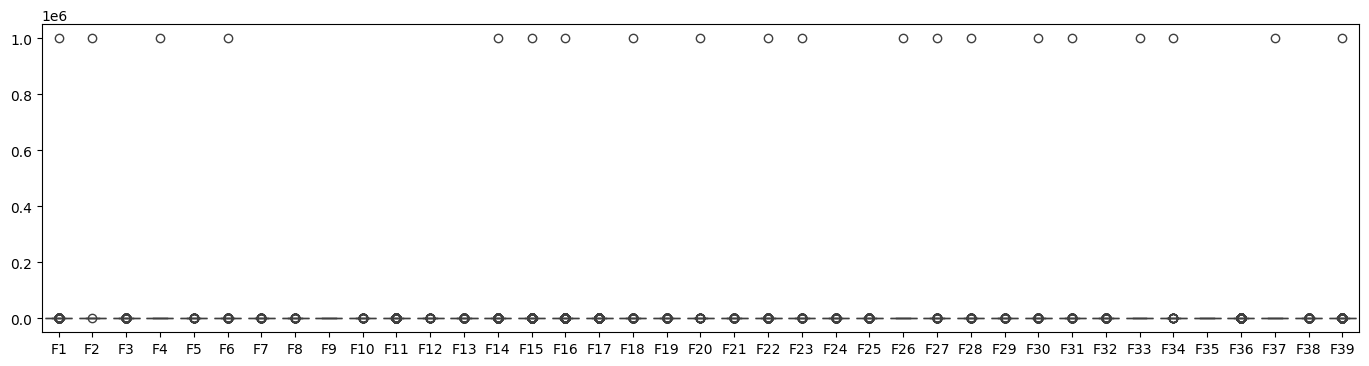

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using a boxplot
# sns.boxplot(x=imputed_data_df[['F1','F2']])
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 1:40])
plt.show()

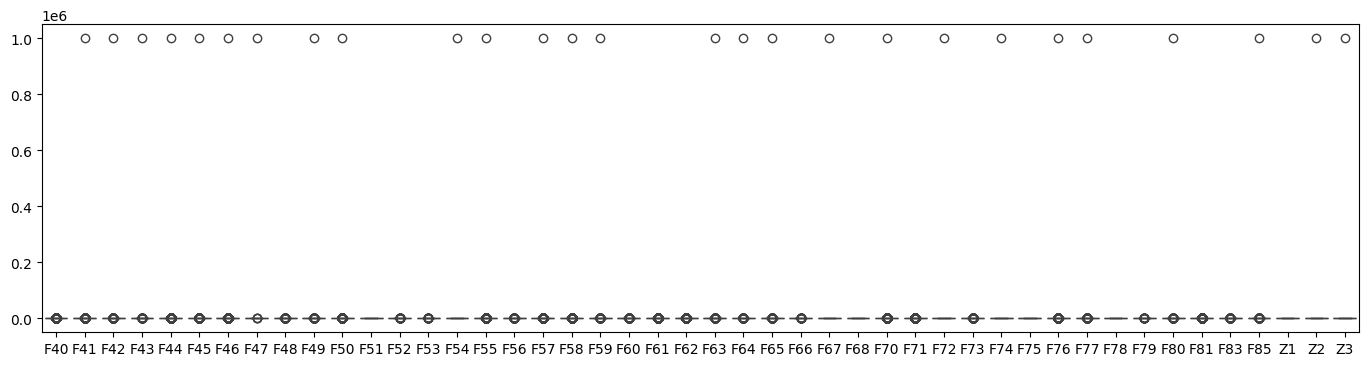

In [43]:
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 40:])
plt.show()

---

The above output shows that the boxes are squeezed at the bottom, and there are some points at the very top. So, there are definitely some outliers present. Let's take care of them. 

I will use a technique called capping, which preserves the data points but reduces the extreme values.

I will use the standard 1.5*IQR (whiskers)to identify the outliers. 

- For lower outliers (if any):
    Any values below (Q1 - 1.5 * IQR) will be replaced with (Q1 - 1.5 * IQR).
- For upper outliers (If any):
    Any values above (Q3 + 1.5 * IQR) witl be replaced with (Q3 + 1.5 * IQR).



---

In [44]:
#lets merge the data and labels into a single dataframe
merged_df = imputed_data_df.merge(labels_df, on='Sample')

In [45]:
import numpy as np

# Select only the columns that should be checked for outliers
data_to_check = merged_df.iloc[:, 1:-1]

Q1 = data_to_check.quantile(0.25)
Q3 = data_to_check.quantile(0.75)
IQR = Q3 - Q1

# Cap every outlier on the lower side by the lower whisker
for col in data_to_check.columns:
    if ((data_to_check[col] < (Q1[col] - 1.5 * IQR[col])).any()):
        merged_df[col] = np.where(merged_df[col] < Q1[col] - 1.5 * IQR[col], Q1[col] - 1.5 * IQR[col], merged_df[col])

# Cap every outlier on the upper side by the upper whisker
for col in data_to_check.columns:
    if ((data_to_check[col] > (Q3[col] + 1.5 * IQR[col])).any()):
        merged_df[col] = np.where(merged_df[col] > Q3[col] + 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col], merged_df[col])

---


Following plot shows there are no more outliers.

---

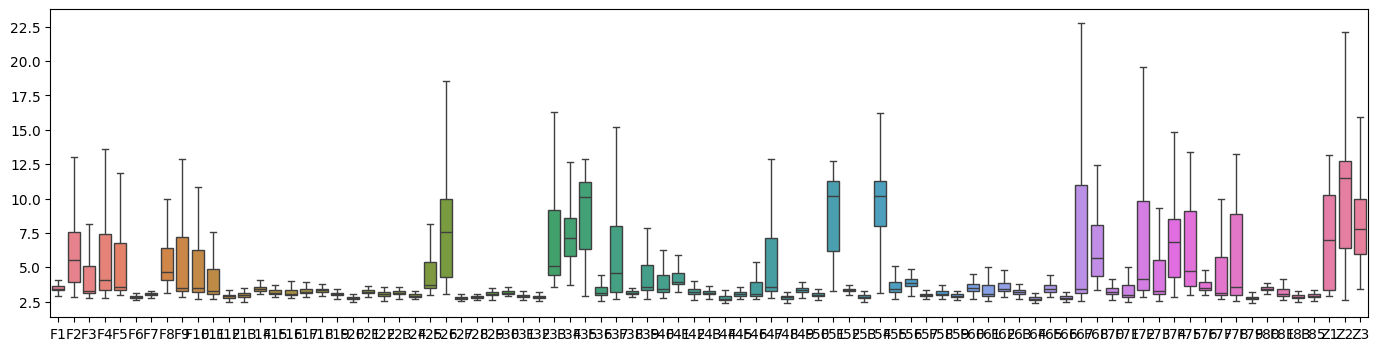

In [46]:
plt.figure(figsize=(17, 4))  
sns.boxplot(data=merged_df.iloc[:, 1:-1])
plt.show()

---
#### Dimensionality reduction:
Now, let's perform PCA to reduce the dimension of the dataset. Since PCA is sensitive to the scale of the data, it's essential to standardize the data so that each feature contributes equally to the analysis.

---

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude the first and last columns
features_df = merged_df.iloc[:, 1:-1]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)


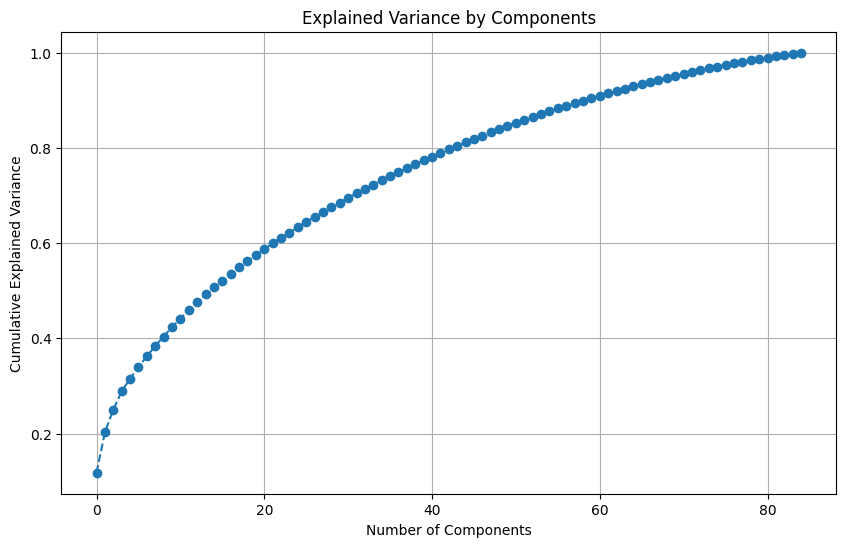

In [48]:
# Initialize PCA without specifying the number of components to keep all
pca = PCA()
pca.fit(scaled_features)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

---
The above figure shows that with 60 components, 90% of the variance can be explained. So, it is okay to choose 60 components, which will reduce the dimensions from over 80 to 60.


## further coreelation function diye komano jay nnaki dekhte hobe.

---

In [49]:
# Initialize PCA; 
pca = PCA(n_components=60)

# Fit PCA on the standardized features
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['Principal Component ' + str(i) for i in range(1, 61)])

# Optionally, include the label column in the PCA result for easier analysis
pca_df['Label'] = merged_df.iloc[:, -1].values


In [50]:
# Print explained variance ratio
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_explained_variance)


Explained variance ratio of each component: [0.11764989 0.08479603 0.04761554 0.03854885 0.02649947 0.02444635
 0.02262248 0.02155037 0.02004097 0.01958203 0.01829097 0.01764004
 0.01688896 0.01590155 0.0149042  0.01435922 0.01410932 0.01355991
 0.01303128 0.0127009  0.01247061 0.01206933 0.011525   0.01137606
 0.01114189 0.01096735 0.0105313  0.01044046 0.01008874 0.00988524
 0.00969706 0.00934424 0.00920242 0.00909486 0.00896344 0.00874926
 0.00861463 0.00838942 0.00835823 0.00805682 0.00793025 0.00783185
 0.00755799 0.00730239 0.00722129 0.00704442 0.00698029 0.00688358
 0.00686047 0.00670772 0.00652513 0.00630852 0.00612651 0.00584718
 0.00580302 0.00571724 0.0056244  0.00534688 0.00521386 0.0051701 ]
Cumulative explained variance: [0.11764989 0.20244592 0.25006146 0.28861032 0.31510979 0.33955614
 0.36217862 0.38372899 0.40376996 0.42335199 0.44164296 0.459283
 0.47617196 0.49207351 0.5069777  0.52133693 0.53544625 0.54900616
 0.56203744 0.57473834 0.58720895 0.59927828 0.61080328

### Choose ML model:

In [51]:
# print label counts
print(pca_df['Label'].value_counts())

Label
Group1    566
Group0    238
Name: count, dtype: int64


In [52]:
with pd.ExcelWriter('output.xlsx') as writer:
    pca_df.to_excel(writer, sheet_name='Data', index=False)
    

---
The above output shows that the data is imbalanced because there are more than twice as many instances of Group 1 as of Group 0.

To tackle this issue, I will be using oversampling. I will use a technique called SMOTE, which generates synthetic examples to balance the data.

---

In [53]:

# Map 'Group0' and 'Group1' to 0 and 1
y = pca_df['Label'].map({'Group0': 0, 'Group1': 1})

# Split the data into training and test sets
X = pca_df.drop('Label', axis=1)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [54]:
# print label counts
print(y_resampled.value_counts())

Label
0    566
1    566
Name: count, dtype: int64


---
From the above output, it can be seen that the dataset is balanced now.

PS: If I had not balanced the dataset, I might have used performance metrics like ROC or class weights during training.



The dataset is not very big. Also, I don't have access to the dataset domain expert. So, I would run multiple ML algorithms on the dataset and choose the best one. 

Here, I will be running Logistic Regression, Random Forest, and SVM with default parameters.



I will perform the following during the model selection:
- I will perform K-fold cross-validation on the data with multiple ML models. Then I will find the best one from them.
- Then, I will tune the parameters of the best model.
- Finally, I will evaluate the model using test data to report its performance on completely unseen data.

I am using cross-validation because of some reasons:
- It reduces the possibility of overfitting or underfitting.
- In cross-validation, the dataset is split into a number of parts, and each time, one part is used for testing and the others for training. This way, each piece of data gets tested once.
- As the result is an average, it is more robust.

I will be using StratifiedkFold for cross-validation because it ensures the class proportions. Although I have handled class imbalance earlier, I think it is a good practice.

In the following code, we'll use StratifiedKFold for cross-validation.

---

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(probability=True))  # Set probability=True to calculate ROC AUC for SVM
]

# Initialize a dictionary to store the cross-validation results
cv_results = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the models and evaluate them using cross-validation
for name, model in models:
    cv_accuracy = []
    cv_precision = []
    cv_recall = []
    cv_f1 = []
    cv_roc_auc = []
    
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        y_pred_prob_cv = model.predict_proba(X_val_cv)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val_cv)
        
        cv_accuracy.append(accuracy_score(y_val_cv, y_pred_cv))
        cv_precision.append(precision_score(y_val_cv, y_pred_cv))
        cv_recall.append(recall_score(y_val_cv, y_pred_cv))
        cv_f1.append(f1_score(y_val_cv, y_pred_cv))
        cv_roc_auc.append(roc_auc_score(y_val_cv, y_pred_prob_cv))

    # Compute the mean of cross-validation scores
    cv_results['Accuracy'].append((name, np.mean(cv_accuracy)))
    cv_results['Precision'].append((name, np.mean(cv_precision)))
    cv_results['Recall'].append((name, np.mean(cv_recall)))
    cv_results['F1 Score'].append((name, np.mean(cv_f1)))
    cv_results['ROC AUC'].append((name, np.mean(cv_roc_auc)))

    print(f'{name} Cross-Validated Performance:')
    print(f'Accuracy: {np.mean(cv_accuracy)}')
    print(f'Precision: {np.mean(cv_precision)}')
    print(f'Recall: {np.mean(cv_recall)}')
    print(f'F1 Score: {np.mean(cv_f1)}')
    print(f'ROC AUC Score: {np.mean(cv_roc_auc)}\n')

# Find the model with the highest score for each metric based on cross-validation
for metric, scores in cv_results.items():
    best_model, best_score = max(scores, key=lambda x: x[1])
    print(f'Best {metric} in Cross-Validation: {best_model} ({best_score})')

Logistic Regression Cross-Validated Performance:
Accuracy: 0.938121546961326
Precision: 0.9475801360387596
Recall: 0.9259925093632958
F1 Score: 0.936422081356899
ROC AUC Score: 0.9834641778999377

Random Forest Cross-Validated Performance:
Accuracy: 0.9469613259668508
Precision: 0.9423854235651989
Recall: 0.9506616729088639
F1 Score: 0.9464652445983862
ROC AUC Score: 0.9874455902887755

SVM Cross-Validated Performance:
Accuracy: 0.9646408839779005
Precision: 0.9623582173282322
Recall: 0.9663670411985018
F1 Score: 0.9642302341195027
ROC AUC Score: 0.9930144653153935

Best Accuracy in Cross-Validation: SVM (0.9646408839779005)
Best Precision in Cross-Validation: SVM (0.9623582173282322)
Best Recall in Cross-Validation: SVM (0.9663670411985018)
Best F1 Score in Cross-Validation: SVM (0.9642302341195027)
Best ROC AUC in Cross-Validation: SVM (0.9930144653153935)


-----
There are several performance metrics to choose from when choosing the best algorithm. However, again, the best option can not be determined without consulting the domain expert. 

In the task description, it was mentioned that the model will be used to characterize individual patients.

False negatives are very bad in the case of patient data. So, I will focus on Recall.

PS: In the best-case scenario, I will get all of the values of the performance metrics and then consult with the domain expert with these values to figure out the best model.

The above output shows that the best recall and accuracy were obtained from SVM.

Now, let's tune the parameters of SVM to find the best one.

---

In [56]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, accuracy_score


# Define the SVM model
svm = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5)

# Define scoring metrics: Recall and Accuracy
scoring = {
    'recall': make_scorer(recall_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring=scoring, cv=skf, refit='recall')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters, best recall score, and best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
print("Best Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Recall Score: 0.9689439741173986
Best Accuracy Score: 0.969060773480663


---
Here the best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 

Let's evaluate it with the test set.

----

In [57]:
from sklearn.metrics import classification_report

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate recall and accuracy on the test set
test_recall = recall_score(y_test, y_pred, average='macro')
test_accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print("Test Recall:", test_recall)
print("Test Accuracy:", test_accuracy)

# Print the classification report for detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Recall: 0.9547897196261682
Test Accuracy: 0.9559471365638766

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.94      0.97      0.96       120

    accuracy                           0.96       227
   macro avg       0.96      0.95      0.96       227
weighted avg       0.96      0.96      0.96       227



---
I can see the accuracy and recall are similar to the cross-validation period. So, I can say that there was no overfitting or underfitting.

#### What I will do after doing all this:
- I will give the above output to my supervisor and say that during cross-validation, SVM gave the best result, and this result is for SVM from test set data.

- If my supervisor approves, I will finally train an SVM model with the whole dataset and give that model to my supervisor or the client.

#### What I will do to predict a single instance with this model:
- I will first preprocess the data as it was done during the training period.
- Then, I will use the predict method of the trained model to predict the class of the new input data.

To do this, I might also build an API. The data will be sent to the API as JSON. The API will do the above steps and then reply with the result as a JSON.

----



